In [1]:
%matplotlib inline

import random 
from mayavi import mlab
from mxnet import autograd, gluon, np, npx
from d2l import mxnet as d2l 

npx.set_np()

In [2]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X=np.random.normal(0,1, (num_examples,len(w)))
    y=np.dot(X, w)+b
    y+=np.random.normal(0,0.01, y.shape)
    return X, y.reshape((-1,1))

In [3]:
true_w=np.array([2,-3.4])
true_b=4.2
features, labels=synthetic_data(true_w, true_b,1000)

[09:01:04] /home/mertins/Desenvolvimento/C/Terceiros/mxnet/src/storage/storage.cc:205: Using Pooled (Naive) StorageManager for CPU


In [4]:
(1000,len(true_w))

(1000, 2)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])
print('features:', features[1],'\nlabel:', labels[1])

features: [2.2122064 1.1630787] 
label: [4.662078]
features: [0.7740038 0.4838046] 
label: [4.0968843]


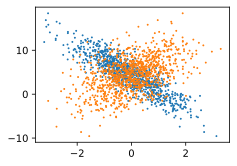

In [6]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(),1)
d2l.plt.scatter(features[:, (0)].asnumpy(), labels.asnumpy(),1)

In [7]:
def data_iter(batch_size, features,labels):
	num_examples=len(features)
	indices=list(range(num_examples))
	# The examples are read at random, in no particular order
	random.shuffle(indices)
	for i in range(0, num_examples, batch_size):
		batch_indices=np.array(indices[i:min(i+batch_size, num_examples)])
		yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size=10
for X, y in data_iter(batch_size, features, labels):
    print(X,'\n###\n', y)
    break

[[-0.15805228  1.8257332 ]
 [-0.5517244  -0.27302608]
 [-0.9327971  -0.80282366]
 [-1.1448301  -0.35326418]
 [-0.9669159  -0.8711447 ]
 [-0.3896926  -0.8198357 ]
 [ 1.0713176  -0.8016936 ]
 [-0.52308416 -1.1180092 ]
 [ 0.59501076  0.37921664]
 [-0.74951595 -0.56062907]] 
###
 [[-2.3186932]
 [ 4.025714 ]
 [ 5.0636163]
 [ 3.102985 ]
 [ 5.2282877]
 [ 6.216496 ]
 [ 9.055935 ]
 [ 6.9662256]
 [ 4.0954175]
 [ 4.5837693]]


In [9]:
w=np.random.normal(0,0.01,(2,1))
#w=np.zeros((2,1))
b=np.zeros(1)
w.attach_grad()
b.attach_grad()

In [10]:
def linreg(X,w,b):
    """ the linear regression model """
    return np.dot(X,w)+b

In [11]:
def squared_loss(y_hat,y):
    """Squared loss """
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [12]:
def sgd(params,lr,batch_size):
    """Minibatch stochastic gradient descent"""
    for param in params:
        param[:]=param-lr*param.grad/batch_size

In [13]:
lr=0.03
num_epochs=3
net = linreg
loss=squared_loss

In [14]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l=loss(net(X,w,b),y)
        l.backward()
        sgd([w,b],lr,batch_size)
    train_1=loss(net(features,w,b),labels)
    print(f"epoch {epoch+1},loss {float(train_1.mean()):f}")

epoch 1,loss 0.025140
epoch 2,loss 0.000089
epoch 3,loss 0.000051


In [15]:
print(f'error in estimating w:{true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b-b}')

error in estimating w:[0.00020611 0.0001564 ]
error in estimating b:[0.00072384]


In [16]:
w.shape,true_w.shape

((2, 1), (2,))

## Concise implementation of Linear Regression

pg 103

In [17]:
true_w=np.array([2,-3.4])
true_b=4.2
features,labels=d2l.synthetic_data(true_w,true_b,1000)

In [18]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset=gluon.data.ArrayDataset(*data_arrays)
    return gluon.data.DataLoader(dataset,batch_size,shuffle=is_train)

In [19]:
batch_size=10
data_iter=load_array((features,labels),batch_size)

In [20]:
for i in range(5):
    print(next(iter(data_iter)))

[array([[-2.751762  , -0.60947496],
       [-0.15169501, -1.4534141 ],
       [ 0.89677334,  1.2648787 ],
       [ 1.4474094 ,  0.85416853],
       [ 0.03799963,  2.9228973 ],
       [-1.0042814 , -0.05902341],
       [ 0.25600055, -1.5162635 ],
       [ 0.11203028, -0.62776303],
       [ 1.1050532 , -0.20223604],
       [ 0.500768  ,  0.05536833]]), array([[ 0.7730166],
       [ 8.849278 ],
       [ 1.6890565],
       [ 4.19039  ],
       [-5.662397 ],
       [ 2.4078245],
       [ 9.857748 ],
       [ 6.571393 ],
       [ 7.110773 ],
       [ 5.009928 ]])]
[array([[-1.2477031 , -1.6140814 ],
       [-0.19983405,  0.13507414],
       [ 2.2673025 , -0.30361623],
       [-0.76516163, -1.5772986 ],
       [-0.5415523 ,  0.13369825],
       [-0.8998838 ,  0.35796505],
       [-0.5024398 , -0.5637206 ],
       [-1.2087938 ,  0.6293677 ],
       [-0.23003308,  1.2655988 ],
       [ 0.2810657 ,  0.04403316]]), array([[ 7.1883016 ],
       [ 3.3325043 ],
       [ 9.777746  ],
       [ 8.04250

In [21]:
from mxnet.gluon import nn
from mxnet import init

In [22]:
net= nn.Sequential()
net.add(nn.Dense(1))

In [23]:
net.initialize(init.Normal(sigma=0.01))

In [24]:
loss=gluon.loss.L2Loss()

In [34]:
help(gluon.Trainer)

Help on class Trainer in module mxnet.gluon.trainer:

class Trainer(builtins.object)
 |  Trainer(params, optimizer, optimizer_params=None, kvstore='device', compression_params=None, update_on_kvstore=None)
 |  
 |  Applies an `Optimizer` on a set of Parameters. Trainer should
 |  be used together with `autograd`.
 |  
 |  .. note::
 |  
 |      For the following cases, updates will always happen on kvstore,
 |      i.e., you cannot set update_on_kvstore=False.
 |  
 |      - dist kvstore with sparse weights or sparse gradients
 |      - dist async kvstore
 |      - `optimizer.lr_scheduler` is not None
 |  
 |  Parameters
 |  ----------
 |  params : Dict
 |      The set of parameters to optimize.
 |  optimizer : str or Optimizer
 |      The optimizer to use. See
 |      `help <https://mxnet.apache.org/api/python/docs/api/optimizer/index.html#mxnet.optimizer.Optimizer>`_
 |      on Optimizer for a list of available optimizers.
 |  optimizer_params : dict
 |      Key-word arguments to be 

In [33]:
trainer=gluon.Trainer(net.collect_params(),optimizer='sgd',optimizer_params={'leaning_rate':0.03})

TypeError: object.__init__() takes exactly one argument (the instance to initialize)